In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import GridSearchCV

**The dataset contains an airline passenger satisfaction survey.**

**Variables:**
* **Gender:** Gender of the passengers (Female, Male)
 
* **Customer Type:** The customer type (Loyal customer, disloyal customer)
 
* **Age:** The actual age of the passengers
 
* **Type of Travel:** Purpose of the flight of the passengers (Personal Travel, Business Travel)
 
* **Class:** Travel class in the plane of the passengers (Business, Eco, Eco Plus)
 
* **Flight distance:** The flight distance of this journey
 
* **Inflight wifi service:** Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
 
* **Departure/Arrival time convenient:** Satisfaction level of Departure/Arrival time convenient
 
* **Ease of Online booking:** Satisfaction level of online booking

* **Gate location:** Satisfaction level of Gate location
 
* **Food and drink:** Satisfaction level of Food and drink

* **Online boarding:** Satisfaction level of online boarding

* **Seat comfort:** Satisfaction level of Seat comfort
 
* **Inflight entertainment:** Satisfaction level of inflight entertainment
 
* **On-board service:** Satisfaction level of On-board service

* **Leg room service:** Satisfaction level of Leg room service

* **Baggage handling:** Satisfaction level of baggage handling

* **Check-in service:** Satisfaction level of Check-in service

* **Inflight service:** Satisfaction level of inflight service

* **Cleanliness:** Satisfaction level of Cleanliness

* **Departure Delay in Minutes:** Minutes delayed when departure

* **Arrival Delay in Minutes:** Minutes delayed when Arrival

* **Satisfaction:** Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [2]:
# Download dataset
!gdown --id 1iW2yZyevprk44JtaGPKuk_Ad_bp_FmfA

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1iW2yZyevprk44JtaGPKuk_Ad_bp_FmfA
To: /content/Airline_Passenger_Satisfaction.zip
100% 2.84M/2.84M [00:00<00:00, 134MB/s]


In [3]:
# Unzip file
!rm train.csv
!rm test.csv
!unzip /content/Airline_Passenger_Satisfaction.zip > /dev/null

In [4]:
#reading the data
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

print(train_data.shape)
print(test_data.shape)

(103904, 25)
(25976, 25)


In [5]:
train_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
#Dropping the Unnamed and id cols in both training and testing datasets
train_data.drop(['Unnamed: 0','id'], axis=1, inplace=True)
test_data.drop(['Unnamed: 0','id'], axis=1, inplace=True)

train_data.shape

(103904, 23)

In [7]:
train_data['satisfaction'] = train_data['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})
train_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


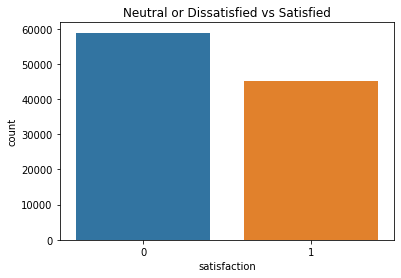

In [8]:
# Check if data is unbalance
sns.countplot(x ='satisfaction', data = train_data)
plt.title('Neutral or Dissatisfied vs Satisfied')
plt.show()

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [10]:
#Numercial Columns
numerical_cols = [col for col in train_data.columns if train_data[col].dtypes in ['int64','float64']]
numerical_cols

['Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'satisfaction']

In [11]:
train_data[numerical_cols].describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,0.433333
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682,0.495538
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


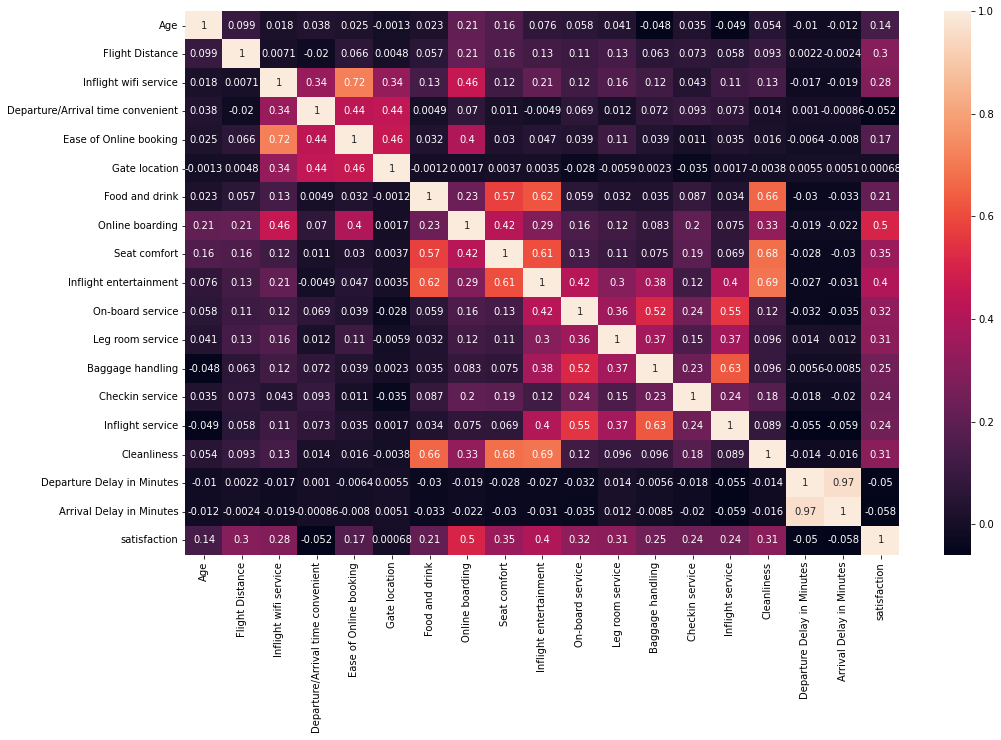

In [12]:
#Correlation Heatmap
plt.figure(figsize=(16,10))
sns.heatmap(train_data[numerical_cols].corr(), annot=True)
plt.show()

In [13]:
numerical_cols.remove('satisfaction')
numerical_cols

['Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [14]:
#Categorical Columns
categorical_cols = [col for col in train_data.columns if train_data[col].dtypes in ['object']]
#categorical_cols.append('satisfaction')  #Adding the satisfaction(target) column for EDA
categorical_cols

['Gender', 'Customer Type', 'Type of Travel', 'Class']

**Notes on the categorical visualisations:**
1. There's no difference in the satisfaction for Male or Female passengers.
2. Loyal Customers were more Satisfied than Disloyal Customers.
3. Business Travel had higher satisfaction rate than personal travel.
4. Business Class had higher satifaction rate than both Economy and Economy Plus.

# **Preprocessing**

In [15]:
train_data.shape

(103904, 23)

In [16]:
train_data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [17]:
#Dropping the 310 rows which have null values in the Arrival Delay in Minutes
train_data.dropna(axis=0, inplace=True)
train_data.shape

(103594, 23)

In [18]:
test_data.dropna(axis=0, inplace=True)
test_data.shape

(25893, 23)

In [19]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_data[numerical_cols] = sc.fit_transform(train_data[numerical_cols])
test_data[numerical_cols] = sc.transform(test_data[numerical_cols])

train_data.head(3)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,-1.745542,Personal Travel,Eco Plus,-0.731305,0.203521,0.616249,0.173716,-1.547312,...,1.231530,0.479237,-0.267143,0.311853,0.549773,1.156211,1.305913,0.268966,0.072905,0
1,Male,disloyal Customer,-0.951526,Business travel,Business,-0.956916,0.203521,-0.695032,0.173716,0.017981,...,-1.769166,-1.849452,1.253304,-0.534854,-1.821038,0.305580,-1.742432,-0.360682,-0.237184,0
2,Female,Loyal Customer,-0.885358,Business travel,Business,-0.047454,-0.549571,-0.695032,-0.541118,-0.764666,...,1.231530,0.479237,-0.267143,0.311853,0.549773,0.305580,1.305913,-0.386917,-0.392229,1


In [20]:
#Using PCA to reduce the dimensions of highly correlated features
from sklearn.decomposition import PCA
pca1 = PCA(n_components=1)
train_data['PCA1'] = pca1.fit_transform(train_data[['Inflight wifi service', 'Ease of Online booking']])
test_data['PCA1'] = pca1.transform(test_data[['Inflight wifi service', 'Ease of Online booking']])
train_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,PCA1
0,Male,Loyal Customer,-1.745542,Personal Travel,Eco Plus,-0.731305,0.203521,0.616249,0.173716,-1.547312,...,0.479237,-0.267143,0.311853,0.549773,1.156211,1.305913,0.268966,0.072905,0,-0.266747
1,Male,disloyal Customer,-0.951526,Business travel,Business,-0.956916,0.203521,-0.695032,0.173716,0.017981,...,-1.849452,1.253304,-0.534854,-1.821038,0.305580,-1.742432,-0.360682,-0.237184,0,-0.266747
2,Female,Loyal Customer,-0.885358,Business travel,Business,-0.047454,-0.549571,-0.695032,-0.541118,-0.764666,...,0.479237,-0.267143,0.311853,0.549773,0.305580,1.305913,-0.386917,-0.392229,1,0.771233
3,Female,Loyal Customer,-0.951526,Business travel,Business,-0.629028,-0.549571,1.271890,1.603383,1.583273,...,-1.073222,1.253304,-0.534854,-1.821038,0.305580,-0.980345,-0.098328,-0.159662,0,-0.745158
4,Male,Loyal Customer,1.430521,Business travel,Business,-0.977973,0.203521,-0.039391,0.173716,0.017981,...,-0.296993,0.493081,0.311853,-0.240497,-0.545051,-0.218259,-0.386917,-0.392229,1,-0.266747


In [21]:
pca2 = PCA(n_components=1)
train_data['PCA2'] = pca2.fit_transform(train_data[['Cleanliness', 'Inflight entertainment','Seat comfort','Food and drink']])
test_data['PCA2'] = pca2.transform(test_data[['Cleanliness', 'Inflight entertainment','Seat comfort','Food and drink']])
train_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,PCA1,PCA2
0,Male,Loyal Customer,-1.745542,Personal Travel,Eco Plus,-0.731305,0.203521,0.616249,0.173716,-1.547312,...,-0.267143,0.311853,0.549773,1.156211,1.305913,0.268966,0.072905,0,-0.266747,-2.536105
1,Male,disloyal Customer,-0.951526,Business travel,Business,-0.956916,0.203521,-0.695032,0.173716,0.017981,...,1.253304,-0.534854,-1.821038,0.305580,-1.742432,-0.360682,-0.237184,0,-0.266747,3.507741
2,Female,Loyal Customer,-0.885358,Business travel,Business,-0.047454,-0.549571,-0.695032,-0.541118,-0.764666,...,-0.267143,0.311853,0.549773,0.305580,1.305913,-0.386917,-0.392229,1,0.771233,-2.536105
3,Female,Loyal Customer,-0.951526,Business travel,Business,-0.629028,-0.549571,1.271890,1.603383,1.583273,...,1.253304,-0.534854,-1.821038,0.305580,-0.980345,-0.098328,-0.159662,0,-0.745158,1.996780
4,Male,Loyal Customer,1.430521,Business travel,Business,-0.977973,0.203521,-0.039391,0.173716,0.017981,...,0.493081,0.311853,-0.240497,-0.545051,-0.218259,-0.386917,-0.392229,1,-0.266747,-0.623246


In [61]:
# Guardarlo en un archivo pickle
import pickle, time

preprocess_dict = {
    "sc": sc,
    "pca1": pca1,
    "pca2": pca2
}

file_name = "preprocess.pickle"
with open(file_name, 'wb') as handle:
    pickle.dump(preprocess_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

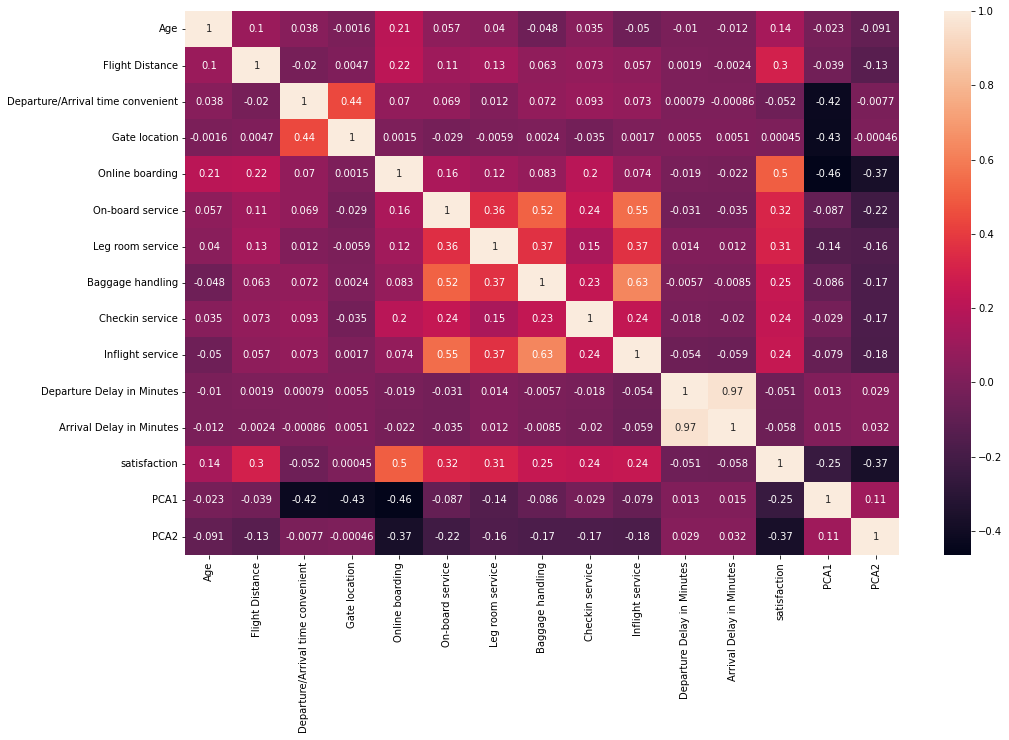

In [23]:
train_data.drop(['Cleanliness','Inflight entertainment','Seat comfort','Food and drink','Inflight wifi service',
                 'Ease of Online booking'], axis=1, inplace=True)
test_data.drop(['Cleanliness','Inflight entertainment','Seat comfort','Food and drink','Inflight wifi service',
                'Ease of Online booking'], axis=1, inplace=True)
#Correlation Heatmap
plt.figure(figsize=(16,10))
sns.heatmap(train_data.corr(), annot=True)
plt.show()

In [24]:
#Gender either Male or Female had the same satisfaction rates so I dropped the column
train_data.drop('Gender', axis=1, inplace=True)
test_data.drop('Gender', axis=1, inplace=True)

In [25]:
train_data['Class'].value_counts()

Business    49533
Eco         46593
Eco Plus     7468
Name: Class, dtype: int64

In [26]:
#Mapping the Customer Type, Type of Travel and Class Columns in the Training Data
train_data['Customer Type'] = train_data['Customer Type'].map({'disloyal Customer': 0, 'Loyal Customer' :1})
train_data['Type of Travel'] = train_data['Type of Travel'].map({'Personal Travel': 0, 'Business travel' :1})
train_data['Class'] = train_data['Class'].map({'Eco': 0, 'Eco Plus' :1, 'Business': 2})

train_data.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Gate location,Online boarding,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,PCA1,PCA2
0,1,-1.745542,0,1,-0.731305,0.616249,-1.547312,-0.185632,0.479237,-0.267143,0.311853,0.549773,1.156211,0.268966,0.072905,0,-0.266747,-2.536105
1,0,-0.951526,1,2,-0.956916,-0.695032,0.017981,-0.185632,-1.849452,1.253304,-0.534854,-1.821038,0.305580,-0.360682,-0.237184,0,-0.266747,3.507741
2,1,-0.885358,1,2,-0.047454,-0.695032,-0.764666,1.296479,0.479237,-0.267143,0.311853,0.549773,0.305580,-0.386917,-0.392229,1,0.771233,-2.536105
3,1,-0.951526,1,2,-0.629028,1.271890,1.583273,-0.926688,-1.073222,1.253304,-0.534854,-1.821038,0.305580,-0.098328,-0.159662,0,-0.745158,1.996780
4,1,1.430521,1,2,-0.977973,-0.039391,0.017981,1.296479,-0.296993,0.493081,0.311853,-0.240497,-0.545051,-0.386917,-0.392229,1,-0.266747,-0.623246


In [27]:
#Mapping the Customer Type, Type of Travel and Class Columns in the Testing Data
test_data['Customer Type'] = test_data['Customer Type'].map({'disloyal Customer': 0, 'Loyal Customer' :1})
test_data['Type of Travel'] = test_data['Type of Travel'].map({'Personal Travel': 0, 'Business travel' :1})
test_data['Class'] = test_data['Class'].map({'Eco': 0, 'Eco Plus' :1, 'Business': 2})
test_data['satisfaction'] = test_data['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied' :1})

test_data.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Gate location,Online boarding,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,PCA1,PCA2
0,1,0.835009,1,0,-1.032120,0.616249,0.800627,0.555423,1.255467,1.253304,1.158561,-1.030767,1.156211,0.924849,0.744766,1,-1.331779,-1.060303
1,1,-0.223679,1,2,1.678219,-1.350673,-1.547312,0.555423,0.479237,0.493081,0.311853,-0.240497,0.305580,-0.386917,-0.392229,1,0.798285,-2.159918
2,0,-1.282366,1,0,-1.000033,-2.006314,0.800627,-0.926688,0.479237,-1.787590,-0.534854,-1.030767,-1.395683,-0.386917,-0.392229,0,0.771233,1.996780
3,1,0.305665,1,2,2.193614,-2.006314,-0.764666,0.555423,-1.849452,-1.787590,-2.228269,-0.240497,-2.246314,-0.386917,-0.237184,1,2.847193,0.470153
4,1,0.636505,1,0,-0.007345,-0.039391,0.017981,-1.667744,-1.073222,-1.027367,-1.381562,0.549773,-1.395683,-0.386917,0.124587,1,-0.239694,0.469557


# **Building the model**

In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Customer Type                      103594 non-null  int64  
 1   Age                                103594 non-null  float64
 2   Type of Travel                     103594 non-null  int64  
 3   Class                              103594 non-null  int64  
 4   Flight Distance                    103594 non-null  float64
 5   Departure/Arrival time convenient  103594 non-null  float64
 6   Gate location                      103594 non-null  float64
 7   Online boarding                    103594 non-null  float64
 8   On-board service                   103594 non-null  float64
 9   Leg room service                   103594 non-null  float64
 10  Baggage handling                   103594 non-null  float64
 11  Checkin service                    1035

In [48]:
X_train = train_data.drop('satisfaction', axis=1)
y_train = train_data['satisfaction']

X_test = test_data.drop('satisfaction', axis=1)
y_test = test_data['satisfaction']

X_train.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Gate location,Online boarding,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Departure Delay in Minutes,Arrival Delay in Minutes,PCA1,PCA2
0,1,-1.745542,0,1,-0.731305,0.616249,-1.547312,-0.185632,0.479237,-0.267143,0.311853,0.549773,1.156211,0.268966,0.072905,-0.266747,-2.536105
1,0,-0.951526,1,2,-0.956916,-0.695032,0.017981,-0.185632,-1.849452,1.253304,-0.534854,-1.821038,0.305580,-0.360682,-0.237184,-0.266747,3.507741
2,1,-0.885358,1,2,-0.047454,-0.695032,-0.764666,1.296479,0.479237,-0.267143,0.311853,0.549773,0.305580,-0.386917,-0.392229,0.771233,-2.536105
3,1,-0.951526,1,2,-0.629028,1.271890,1.583273,-0.926688,-1.073222,1.253304,-0.534854,-1.821038,0.305580,-0.098328,-0.159662,-0.745158,1.996780
4,1,1.430521,1,2,-0.977973,-0.039391,0.017981,1.296479,-0.296993,0.493081,0.311853,-0.240497,-0.545051,-0.386917,-0.392229,-0.266747,-0.623246


In [28]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (103594, 17)
X_test shape: (25893, 17)


### Model: Random Forest

In [29]:
from sklearn.model_selection import train_test_split

# Split into train/cv
X_train_rf, X_cv_rf, y_train_rf, y_cv_rf = train_test_split(X_train, y_train,
                                                            test_size=0.2,
                                                            stratify=y_train)

In [30]:
def testModel(clf_,grid_values_,X_train_,y_train_,X_cv_,y_cv_,scoring_='f1',verbose_=0):
    # model.get_params() # Return selected params
    # cv=None -> None, to use the default 5-fold cross validation (K-Fold, k=5)
    model_ = GridSearchCV(clf_, param_grid = grid_values_, cv=None, scoring=scoring_,verbose=verbose_)
    model_.fit(X_train_, y_train_)

    y_pred = model_.predict(X_cv_)
    metrics_={    
        "accuracy":         metrics.accuracy_score(y_cv_, y_pred),
        "precision":        metrics.precision_score(y_cv_, y_pred),
        "recall":           metrics.recall_score(y_cv_, y_pred),
        "f1_score":         metrics.f1_score(y_cv_, y_pred),
        "confusion_matrix": metrics.confusion_matrix(y_cv_, y_pred)
    }
    return model_, metrics_

In [31]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(criterion="entropy")
grid_values = {}
model, model_metrics = testModel(clf,grid_values,X_train_rf,y_train_rf,X_cv_rf,y_cv_rf)

In [32]:
model_metrics

{'accuracy': 0.9593127081422849, 'confusion_matrix': array([[11483,   257],
        [  586,  8393]]), 'f1_score': 0.9521810652901469, 'precision': 0.9702890173410404, 'recall': 0.934736607640049}

### Model: Neural Network

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop,Adam
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [34]:
#Adding an early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', 
                   mode='max', 
                   patience=10,  #Stop the model training if the validation accuracy doesnt increase in 10 Epochs
                   restore_best_weights=True)

In [35]:
NN_Classifier = model.fit(X_train, y_train,
                          batch_size=1000,
                          epochs=100,
                          callbacks =[es],
                          verbose=2,
                          validation_data=(X_test, y_test))

Epoch 1/100
104/104 - 5s - loss: 0.2863 - accuracy: 0.8823 - val_loss: 0.1861 - val_accuracy: 0.9240 - 5s/epoch - 52ms/step
Epoch 2/100
104/104 - 4s - loss: 0.1835 - accuracy: 0.9250 - val_loss: 0.1494 - val_accuracy: 0.9386 - 4s/epoch - 41ms/step
Epoch 3/100
104/104 - 4s - loss: 0.1577 - accuracy: 0.9353 - val_loss: 0.1348 - val_accuracy: 0.9441 - 4s/epoch - 41ms/step
Epoch 4/100
104/104 - 4s - loss: 0.1430 - accuracy: 0.9416 - val_loss: 0.1284 - val_accuracy: 0.9457 - 4s/epoch - 42ms/step
Epoch 5/100
104/104 - 4s - loss: 0.1339 - accuracy: 0.9445 - val_loss: 0.1234 - val_accuracy: 0.9496 - 4s/epoch - 41ms/step
Epoch 6/100
104/104 - 4s - loss: 0.1288 - accuracy: 0.9474 - val_loss: 0.1205 - val_accuracy: 0.9506 - 4s/epoch - 42ms/step
Epoch 7/100
104/104 - 4s - loss: 0.1239 - accuracy: 0.9485 - val_loss: 0.1159 - val_accuracy: 0.9514 - 4s/epoch - 42ms/step
Epoch 8/100
104/104 - 4s - loss: 0.1192 - accuracy: 0.9501 - val_loss: 0.1129 - val_accuracy: 0.9535 - 4s/epoch - 42ms/step
Epoch 9/

In [36]:
# Guardarlo en un archivo pickle
import pickle, time
file_name = "ariline_passanger_satisfaction_model_ann" + str(time.time()).split(".")[0] + ".pickle"
with open(file_name, 'wb') as handle:
    pickle.dump(model, handle, protocol=pickle.HIGHEST_PROTOCOL)

INFO:tensorflow:Assets written to: ram://029a4280-9e3b-4180-b428-1d64ecbf1f58/assets


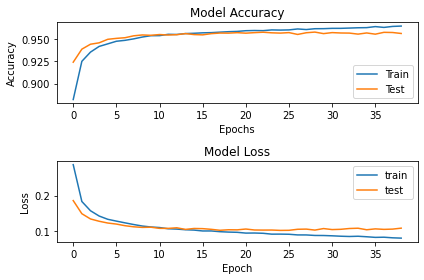

In [37]:
#Plotting Neural Network Training and validation
%matplotlib inline
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(NN_Classifier.history['accuracy'])
plt.plot(NN_Classifier.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(NN_Classifier.history['loss'])
plt.plot(NN_Classifier.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

# **Predictions**

Accuracy Score:  95.77%
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14528
           1       0.97      0.93      0.95     11365

    accuracy                           0.96     25893
   macro avg       0.96      0.95      0.96     25893
weighted avg       0.96      0.96      0.96     25893



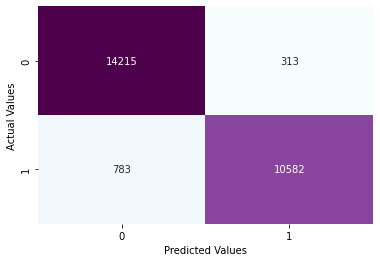

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred=(model.predict(X_test) > 0.5).astype(int)   
print('Accuracy Score: ', '{:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

### Load model and predict new data

In [29]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pickle

In [62]:
local_dir = "./"
model_path = "./ariline_passanger_satisfaction_model_ann.pickle"
preprocess_dict_path = "./preprocess.pickle"

In [75]:
def preprocess(X_):
  X = X_.copy()
  ## Load_data
  preprocess_dict = pickle.load(open(preprocess_dict_path,"rb"))
  sc = preprocess_dict["sc"]
  pca1 = preprocess_dict["pca1"]
  pca2 = preprocess_dict["pca2"]
  
  numerical_cols = ['Age',
    'Flight Distance',
    'Inflight wifi service',
    'Departure/Arrival time convenient',
    'Ease of Online booking',
    'Gate location',
    'Food and drink',
    'Online boarding',
    'Seat comfort',
    'Inflight entertainment',
    'On-board service',
    'Leg room service',
    'Baggage handling',
    'Checkin service',
    'Inflight service',
    'Cleanliness',
    'Departure Delay in Minutes',
    'Arrival Delay in Minutes']

  # Drop NaN
  X.dropna(axis=0, inplace=True)

  #Scaling the data
  X[numerical_cols] = sc.transform(X[numerical_cols])

  #Using PCA to reduce the dimensions of highly correlated features
  X['PCA1'] = pca1.transform(X[['Inflight wifi service', 'Ease of Online booking']])
  X['PCA2'] = pca2.transform(X[['Cleanliness', 'Inflight entertainment','Seat comfort','Food and drink']])

  # Drop columns
  X.drop(['Cleanliness','Inflight entertainment','Seat comfort','Food and drink','Inflight wifi service',
                'Ease of Online booking','Gender','Unnamed: 0','id','satisfaction'], axis=1, inplace=True)
                
  #Mapping the Customer Type, Type of Travel and Class Columns in the Testing Data
  X['Customer Type'] = X['Customer Type'].map({'disloyal Customer': 0, 'Loyal Customer' :1})
  X['Type of Travel'] = X['Type of Travel'].map({'Personal Travel': 0, 'Business travel' :1})
  X['Class'] = X['Class'].map({'Eco': 0, 'Eco Plus' :1, 'Business': 2})

  return X
  
def make_predictions(files_name,model):
  for file_name in files_name:
      X_raw = pd.read_csv(local_dir+file_name)
      X_pred = preprocess(X_raw)
      y_pred = (model.predict(X_pred))
      f = open("pred_"+file_name, "w")
      f.write(str(y_pred))
      f.close()
      return y_pred

In [76]:
model = pickle.load(open(model_path,"rb"))

In [77]:
make_predictions(["data.csv"],model)

array([[9.9237561e-01],
       [9.9916327e-01],
       [2.3245811e-04],
       ...,
       [6.6355341e-07],
       [1.0000000e+00],
       [6.8197863e-08]], dtype=float32)